<a href="https://colab.research.google.com/github/Kannapat-Tich/DataScience-Learning/blob/main/02-CreditScore_Customers/07credit-score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np

# Customers Credit Scoring

## 1. Data

In [48]:
credit = pd.read_csv('/content/drive/MyDrive/PEA-intern/02-CreditScore_Customers/file/DataFrame/credit_customer.csv')
credit = pd.DataFrame(credit)
# credit.drop('Unnamed: 0', axis=1, inplace=True)

credit

,ca,bp,bp_type,act_class,tsic,mi_date,mo_date,kva,volt_buy,portion,...,payment_ch,payment,mean,std,count,paid_score,consistency,kwh,age_score,credit_score
0,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-80,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
1,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-85,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
2,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-84,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
3,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-81,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
4,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-85,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268053,20027333058,1020228264,1.0,PPB1,61609.0,2023-12-27,2024-12-31,160.0,4.0,M1,...,รับชำระเงิน กฟข น3,12,12.000000,NaN,1,100.000000,NaN,31.067961,10.018955,NaN
2268054,20027333389,1022550063,1.0,PPB1,63201.0,2023-12-27,2024-12-31,250.0,3.0,AR6,...,รับชำระเงิน กฟข น1,10,10.000000,NaN,1,100.000000,NaN,48.543689,10.018955,NaN
2268055,20027333411,1022549921,2.0,PPB1,11140.0,2023-12-27,2024-12-31,250.0,4.0,AR6,...,รับชำระเงิน กฟข ก1,-7,-7.000000,NaN,1,80.402930,NaN,48.543689,10.018955,NaN
2268056,20027333415,1000883058,2.0,PPB1,50101.0,2023-12-27,2024-12-31,315.0,4.0,HA1,...,รับชำระเงิน กฟข ต3,5,5.000000,NaN,1,100.000000,NaN,61.165049,10.018955,NaN


In [49]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268058 entries, 0 to 2268057
Data columns (total 35 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ca               int64  
 1   bp               int64  
 2   bp_type          float64
 3   act_class        object 
 4   tsic             float64
 5   mi_date          object 
 6   mo_date          object 
 7   kva              float64
 8   volt_buy         float64
 9   portion          object 
 10  meter_type       object 
 11  meter_size       object 
 12  ratecat          object 
 13  region           float64
 14  sec_dep_cash     float64
 15  sec_dep_noncash  float64
 16  meter_age        float64
 17  bill_period      object 
 18  bill_duedate     object 
 19  bill_paydate     object 
 20  amt_debt         float64
 21  installment      object 
 22  inst_period      int64  
 23  dept_doc_type    object 
 24  pay_doc_type     object 
 25  payment_ch       object 
 26  payment          int64  
 27  mean        

In [50]:
credit[credit.ca==credit.ca.unique()[0]]

,ca,bp,bp_type,act_class,tsic,mi_date,mo_date,kva,volt_buy,portion,...,payment_ch,payment,mean,std,count,paid_score,consistency,kwh,age_score,credit_score
0,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-80,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
1,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-85,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
2,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-84,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
3,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-81,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
4,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-85,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
5,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-84,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
6,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-84,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
7,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-84,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
8,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-80,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
9,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-85,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN


In [51]:
credit[credit.ca==credit.ca.unique()[3]].iloc[0]

,36
ca,20000020082
bp,1000449335
bp_type,1.0
act_class,PPB1
tsic,95131.0
mi_date,2008-10-02
mo_date,2024-12-31
kva,160.0
volt_buy,3.0
portion,AR6


## 2. Feature Selection

In [52]:
col = [
    'mean','std','count','meter_age','kva'
    ]

### 2.1 Feature Creation


#### normalization

In [53]:
# credit['paid_score'] = (credit['count'] * credit['mean'])

# # Normalize
# min = credit.paid_score.min()
# max = credit.paid_score.max()

# credit['paid_score'] = ((credit.paid_score - min) / (max - min)) * 99 +1

In [54]:
# credit['consistency'] = credit['std'] * credit['count']

# min = credit.consistency.min()
# max = credit.consistency.max()

# credit['consistency'] = (1 - (credit['consistency'] - min) / (max - min)) * 99 +1

In [55]:
# credit['usage_score'] = (credit.volt_buy * credit.kva) * credit['count']

# min = credit.usage_score.min()
# max = credit.usage_score.max()

# credit['usage_score'] = ((credit.usage_score - min) / (max - min)) * 99 +1

In [56]:
# credit['age_score'] = credit.meter_age

# min = credit.age_score.min()
# max = credit.age_score.max()

# credit['age_score'] = ((credit.age_score - min) / (max - min)) * 99 +1

In [57]:
# weight = {
#     'paid_score':40,
#     'debt_score':20,
#     'consistency':10,
#     'usage_score':15,
#     'age_score':15,
#     }

# credit['credit_score'] = (
#     credit.paid_score * weight['paid_score'] +
#     credit.debt_score * weight['debt_score'] +
#     credit.consistency * weight['consistency'] +
#     credit.usage_score * weight['usage_score'] +
#     credit.age_score * weight['age_score']
#     )

# min = credit.credit_score.min()
# max = credit.credit_score.max()

# credit['credit_score'] = ((credit.credit_score - min) / (max - min)) * 99 +1

#### scaler

In [58]:
credit['paid_score'] = credit['mean']
credit.paid_score = np.where(credit.paid_score >= 0, 100, credit['paid_score'])

credit['consistency'] = 1 - credit['std']

credit['kwh'] = credit.kva
credit.kwh = np.where(credit.kwh >= credit.kva.mean(), 50, credit['kwh'])

credit['age_score'] = credit.meter_age
credit.age_score = np.where(credit.age_score >= credit.meter_age.mean(), 50, credit['age_score'])

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,100))

features = [
    'paid_score',
    'consistency',
    'kwh',
    'age_score']

credit[features] = scale.fit_transform(credit[features])

In [59]:
weight = {
    'paid_score':3,
    'consistency':3,
    'kwh':2,
    'age_score':2,
    }

credit['credit_score'] = (
    credit.paid_score * weight['paid_score'] +
    credit.consistency * weight['consistency'] +
    credit.kwh * weight['kwh'] +
    credit.age_score * weight['age_score']
    )

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,100))

credit['credit_score'] = scale.fit_transform(credit[['credit_score']])

In [60]:
credit.sample(10)

,ca,bp,bp_type,act_class,tsic,mi_date,mo_date,kva,volt_buy,portion,...,payment_ch,payment,mean,std,count,paid_score,consistency,kwh,age_score,credit_score
388154,20003594623,1002918713,1.0,PPB1,63209.0,2010-06-29,2024-12-31,100.0,2.0,AR6,...,รับชำระเงิน กฟข ก3,0,1.166667,3.099365,12,100.000000,99.254705,19.417476,1.353913,51.208724
461208,20004505036,1005022693,1.0,PPB1,1.0,2010-08-30,2024-12-31,160.0,2.0,AR6,...,รับชำระเงิน กฟข น1,0,0.000000,0.000000,12,100.000000,100.000000,31.067961,1.353913,54.721430
1270996,20018999530,1004101890,2.0,GGB1,93400.0,2014-12-29,2024-12-31,500.0,2.0,HA1,...,รับชำระเงิน กฟภ สนญ,-18,-13.000000,6.915069,12,79.304029,98.337153,97.087379,98.971026,90.512610
1666056,20021947455,1000506151,2.0,PPB1,35510.0,2018-07-29,2024-12-31,500.0,2.0,HA1,...,รับชำระเงิน กฟข ก1,2,3.500000,1.445998,12,100.000000,99.652285,97.087379,63.552667,89.851880
1543099,20021112797,1018699255,1.0,PPB1,31212.0,2017-06-13,2024-12-31,400.0,3.0,HA1,...,รับชำระเงิน กฟข น3,-12,-9.500000,2.713602,12,79.945055,99.347468,77.669903,74.681830,79.169970
1371671,20019779601,1016684660,1.0,PPB1,62204.0,2015-11-30,2024-12-31,100.0,2.0,M1,...,รับชำระเงิน กฟข ก2,-9,-4.500000,7.487026,10,80.860806,98.199617,19.417476,89.872732,67.227589
1379226,20019836946,1000787302,2.0,PPB1,92000.0,2015-12-17,2024-12-31,160.0,2.0,AR6,...,รับชำระกลุ่ม กฟภ สนญ,1,-0.750000,8.708669,12,81.547619,97.905852,31.067961,89.412402,70.468295
1568520,20021284726,1002653590,1.0,PPB1,13010.0,2017-09-04,2024-12-31,1000.0,4.0,HA1,...,รับชำระเงิน กฟข ต1,10,5.500000,8.702142,12,100.000000,97.907421,9.708738,72.434335,67.536636
1705282,20022191030,1019040181,2.0,PPB1,36991.0,2018-10-18,2024-12-31,500.0,4.0,HA1,...,รับชำระเงิน กฟข ฉ3,4,0.916667,1.505042,12,100.000000,99.638087,97.087379,61.359328,89.242614
40709,20000716606,1000530540,2.0,GGB1,93311.0,2008-08-25,2024-12-31,3760.0,4.0,HA1,...,GFMIS - ใบกำกับฯ,-31,-35.750000,10.145532,12,75.137363,97.560333,9.708738,1.353913,37.578668


<Axes: >

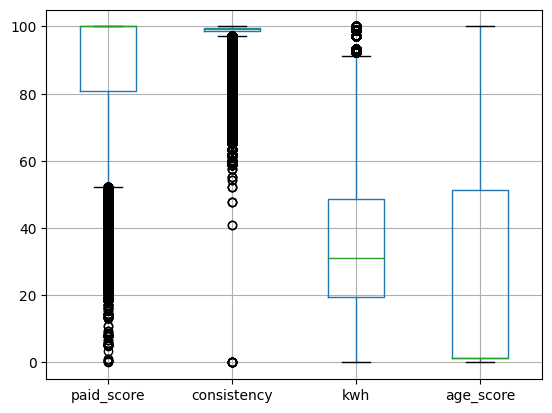

In [61]:
credit.boxplot(column=features)

<Axes: >

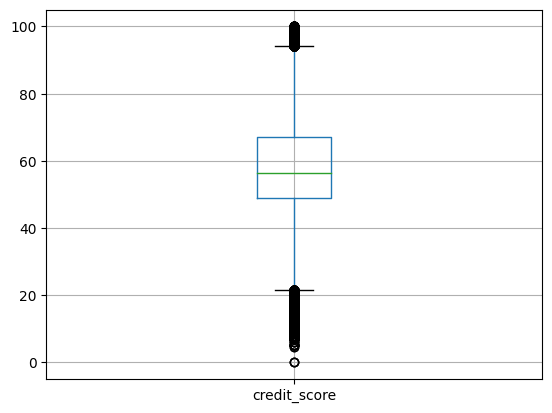

In [62]:
credit.boxplot(column=['credit_score'])

In [63]:
test = credit.drop_duplicates(subset='ca')
test.drop_duplicates(subset='ca',inplace=True)
test

<ipython-input-63-8ba32d88ee07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop_duplicates(subset='ca',inplace=True)


,ca,bp,bp_type,act_class,tsic,mi_date,mo_date,kva,volt_buy,portion,...,payment_ch,payment,mean,std,count,paid_score,consistency,kwh,age_score,credit_score
0,20000000001,1000000008,NaN,GSB1,NaN,NaN,NaN,NaN,NaN,NaN,...,ปรับปรุงแจ้งหนี้ฯ,-80,-82.916667,2.234373,12,66.498779,99.462707,NaN,NaN,NaN
12,20000000002,1000000009,NaN,GGB1,1.0,NaN,NaN,NaN,NaN,NaN,...,รับชำระเงิน กฟภ สนญ,-59,-28.000000,18.145874,12,76.556777,95.636514,NaN,NaN,NaN
24,20000009714,1000446070,2.0,PPB1,93911.0,2007-09-23,2024-12-31,160.0,2.0,AR6,...,รับชำระเงิน กฟข ก1,-4,-3.416667,1.880925,12,81.059219,99.547699,31.067961,1.353913,46.718621
36,20000020082,1000449335,1.0,PPB1,95131.0,2008-10-02,2024-12-31,160.0,3.0,AR6,...,รับชำระเงิน กฟข ก1,3,2.750000,3.918819,8,100.000000,99.057653,31.067961,1.353913,54.332558
48,20000021030,1000612801,2.0,GSB1,63209.0,2008-05-13,2024-12-31,500.0,2.0,C1,...,รับชำระกลุ่ม กฟข ก1,-4,-6.416667,2.644319,12,80.509768,99.364128,97.087379,1.353913,64.578648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268053,20027333058,1020228264,1.0,PPB1,61609.0,2023-12-27,2024-12-31,160.0,4.0,M1,...,รับชำระเงิน กฟข น3,12,12.000000,NaN,1,100.000000,NaN,31.067961,10.018955,NaN
2268054,20027333389,1022550063,1.0,PPB1,63201.0,2023-12-27,2024-12-31,250.0,3.0,AR6,...,รับชำระเงิน กฟข น1,10,10.000000,NaN,1,100.000000,NaN,48.543689,10.018955,NaN
2268055,20027333411,1022549921,2.0,PPB1,11140.0,2023-12-27,2024-12-31,250.0,4.0,AR6,...,รับชำระเงิน กฟข ก1,-7,-7.000000,NaN,1,80.402930,NaN,48.543689,10.018955,NaN
2268056,20027333415,1000883058,2.0,PPB1,50101.0,2023-12-27,2024-12-31,315.0,4.0,HA1,...,รับชำระเงิน กฟข ต3,5,5.000000,NaN,1,100.000000,NaN,61.165049,10.018955,NaN


<Axes: ylabel='Frequency'>

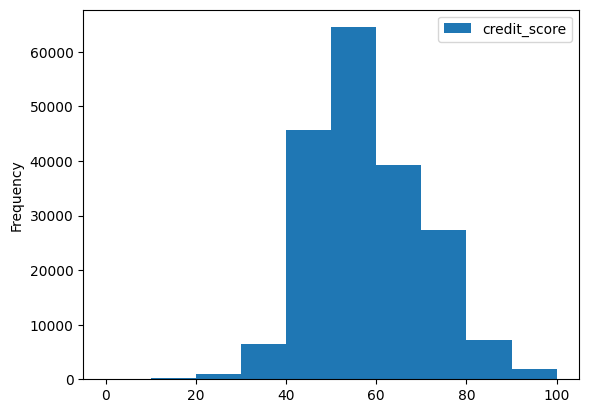

In [64]:
test.plot.hist(y='credit_score')

In [65]:
credit.to_csv('/content/drive/MyDrive/PEA-intern/02-CreditScore_Customers/file/DataFrame/credit_customer.csv',index=False)